In [ ]:
#  File: stochastic_gradient_descent.ipynb
#  ----------------------------
#  This file shows student the fundamental concepts of 
#  machine learing:
#      - loss function
#      - linear regression
#      - training process

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# This function computes the L2 loss which is 
# ----------------------------------------
# [(theta*x_i+b - y_i)**2]
# ----------------------------------------
# of data (x_i, y_i) to the line y_i = theta*x_i + b
# 
# theta: float, slop of the line
# b: float, the point on y axis intersects with the line when x_i=0
# x_i: float, 1 data point
# y_i: float, 1 data point
# return: float, the L2 loss of 1 data point

def loss_function(theta, b, x_i, y_i):
   return (theta*x_i + b - y_i)**2

In [4]:
# You should see 0.25
print(loss_function(0.5, 1.5, 2, 2))

0.25


In [5]:
# This function returns the partial derivative of L2 loss function
# with respect to theta: 
# --------------------------------------
# 2*(theta*x_i+b - y_i)*x_i
# --------------------------------------
# theta: float, slop of the line
# b: float, the point on y axis intersects with the line when x_i=0
# x_i: float, 1 data point
# y_i: float, 1 data point
# return: float, the dJ_dtheta of 1 data point

def dL_dtheta(theta, b, x_i, y_i):
    return 2*(theta*x_i + b - y_i)*x_i

In [6]:
# You should see 2.0
print(dL_dtheta(0.5, 1.5, 2, 2))

2.0


In [7]:
# This function returns the partial derivative of L2 loss function
# with respect to b: 
# --------------------------------------
# 2*(theta*x_i+b - y_i)
# --------------------------------------
# theta: float, slop of the line
# b: float, the point on y axis intersects with the line when x=0
# x_i: float, 1 data point
# y_i: float, 1 data point
# return: float, the dJ_db of 1 data point

def dL_db(theta, b, x_i, y_i):
   return 2*(theta*x_i+b-y_i)

In [8]:
# You should see 1.0
print(dL_db(0.5, 1.5, 2, 2))

1.0


In [9]:
x = [6.1101,5.5277,8.5186,7.0032,5.8598,8.3829,7.4764,8.5781,6.4862,5.0546,5.7107,10.164,5.734,8.4084,5.6407,5.3794,6.3654,5.1301,6.4296,7.0708,6.1891]

In [10]:
y = [6.592,9.1302,13.662,11.854,6.8233,11.886,4.3483,12,6.5987,3.8166,3.2522,15.505,3.1551,7.2258,0.71618,3.5129,5.3048,0.56077,3.6518,5.3893,3.1386]

In [11]:
# ---------- Showing your data ---------- #

(0.0, 30.0)

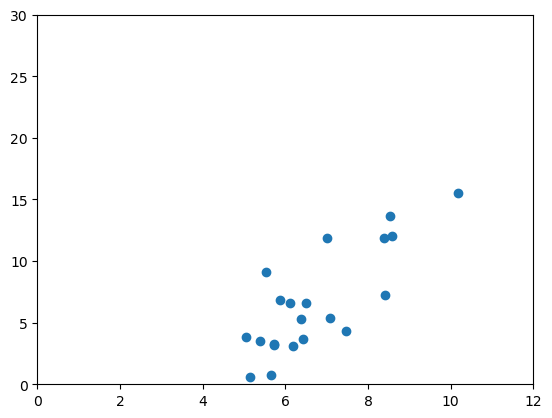

In [12]:
plt.scatter(x, y)
axes = plt.gca()
axes.set_xlim([0,12])
axes.set_ylim([0,30])

In [13]:
# ---------- Initialize your theta ---------- #

In [14]:
theta = 2  
b = 0.5

In [15]:
# ---------- Initialize your alpha ---------- #

In [ ]:
# TODO: which value is appropriate for an ideal alpha?

In [16]:
alpha = 0.01

In [17]:
# ---------- Training process ---------- #
# ---- 11 epochs over all data ----- #

In [31]:
theta_history = []
b_history = []
loss_history = []
cost_history = []
# In SGD, we name '1 iteration through all data' as '1 epoch'!
for epoch in range(11):
    cost = 0
    for i in range(len(x)):
        theta_history.append(theta)
        b_history.append(b)
        loss = loss_function(theta,b,x[i],y[i])  #difference between prediction and actual
        cost += loss  
        loss_history.append(loss)
        
        theta = theta - alpha * dL_dtheta(theta,b,x[i],y[i])
        b = b - alpha * dL_db(theta,b,x[i], y[i])
    cost /= (2*len(x)) #average of the sum of loss
    cost_history.append(cost)
print(cost_history)

[6.422960718543441, 6.393379886041813, 6.2156266564973395, 6.051021414440848, 5.898550398288295, 5.75727988317383, 5.626349780530194, 5.504967752967255, 5.392403802816421, 5.287985296078527, 5.19109238660911]


In [19]:
# ---------- Theta changes during training process ---------- #

In [20]:
print(loss_history)

[36.371742748201, 19.985533822253604, 6.366549582546225, 0.15337505651385624, 10.176166503484122, 0.9000569435465768, 44.14611249570154, 63.52332902527982, 28.854469870073927, 4.297091323345707, 4.528163083238056, 76.39245854974916, 117.46790731470034, 7.117364274320839, 11.966091288745757, 2.715124874344403, 3.9244367399105022, 11.896001249848258, 0.9505617184804823, 2.4599815665237488, 2.5439503423466507, 9.802786611261904, 14.871916173789256, 3.7969890713308176, 0.012830944801467561, 9.746628702523076, 0.6574210305094493, 42.94663552724721, 62.42284288410261, 27.591409197680576, 3.8925915802006967, 4.511452773465697, 71.25184901355176, 110.16870022151232, 7.159827719990766, 11.10647057772952, 2.9181004610751073, 3.769620952355013, 11.437059483279894, 0.8441963971202575, 2.3117050274284012, 2.3965094631491977, 9.899551619624328, 15.176531665676391, 3.127334281385748, 0.0003521904911798526, 9.356488827370875, 0.4592708817840694, 41.808063190747866, 61.37626052385836, 26.40702041783235

theta: 0.01, b = 0.5


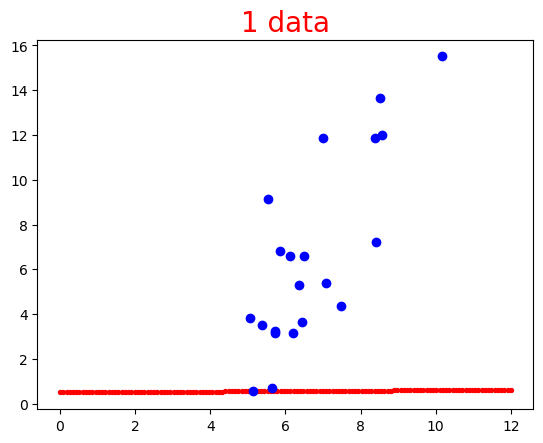

In [21]:
theta = theta_history[0]
b = b_history[0]

print(f'theta: {theta}, b = {b}')

x_plot = np.linspace(0, 12, 140)
y_plot = theta*x_plot + b


plt.scatter(x_plot, y_plot, s=8, color='red')
plt.scatter(x, y, color='blue')

plt.title("1 data", color='red', fontdict = {'fontsize': 20})
plt.show()

theta: 0.746987919598, b = 0.5305565822492851


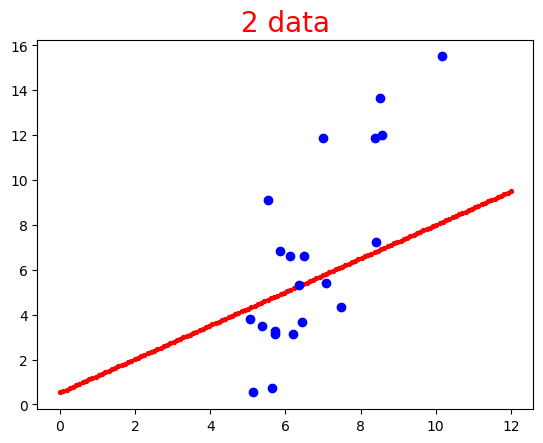

In [22]:
theta = theta_history[1]
b = b_history[1]

print(f'theta: {theta}, b = {b}')

x_plot = np.linspace(0, 12, 140)
y_plot = theta*x_plot + b


plt.scatter(x_plot, y_plot, s=8, color='red')
plt.scatter(x, y, color='blue')

plt.title("2 data", color='red', fontdict = {'fontsize': 20})
plt.show()

theta: 1.2412215991379758, b = 0.5653274379331996


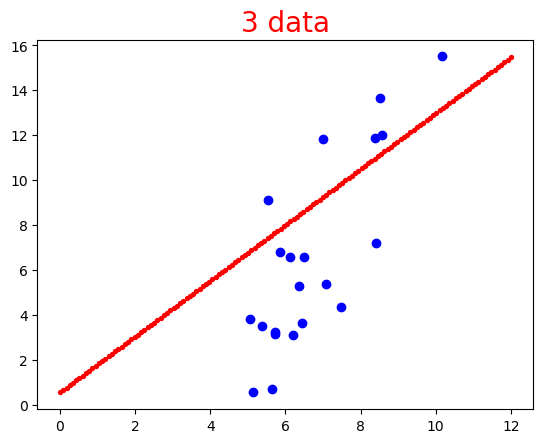

In [23]:
theta = theta_history[2]
b = b_history[2]

print(f'theta: {theta}, b = {b}')

x_plot = np.linspace(0, 12, 140)
y_plot = theta*x_plot + b


plt.scatter(x_plot, y_plot, s=8, color='red')
plt.scatter(x, y, color='blue')

plt.title("3 data", color='red', fontdict = {'fontsize': 20})
plt.show()

theta: 1.6711046124746087, b = 0.5425514541380116


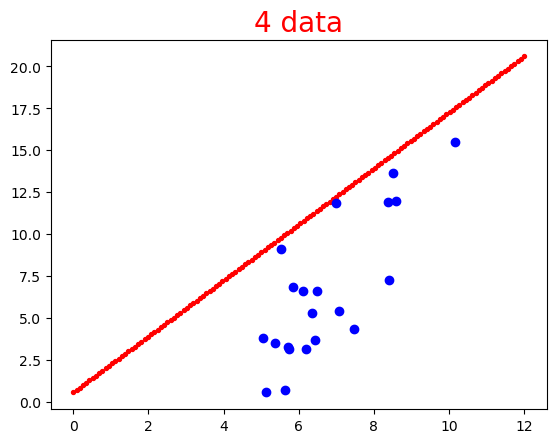

In [24]:
theta = theta_history[3]
b = b_history[3]

print(f'theta: {theta}, b = {b}')

x_plot = np.linspace(0, 12, 140)
y_plot = theta*x_plot + b


plt.scatter(x_plot, y_plot, s=8, color='red')
plt.scatter(x, y, color='blue')

plt.title("4 data", color='red', fontdict = {'fontsize': 20})
plt.show()

theta: 1.6162511694021038, b = 0.5424018212641152


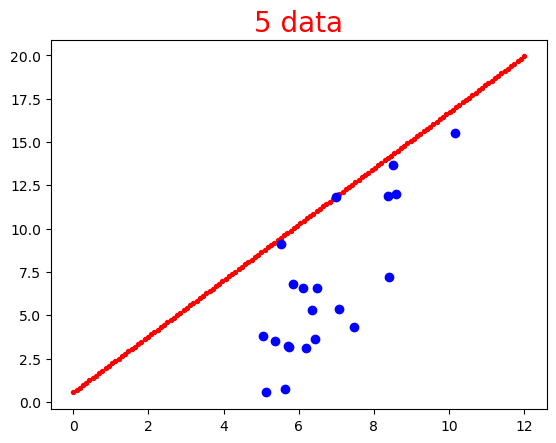

In [25]:
theta = theta_history[4]
b = b_history[4]

print(f'theta: {theta}, b = {b}')

x_plot = np.linspace(0, 12, 140)
y_plot = theta*x_plot + b


plt.scatter(x_plot, y_plot, s=8, color='red')
plt.scatter(x, y, color='blue')

plt.title("5 data", color='red', fontdict = {'fontsize': 20})
plt.show()

theta: 1.2423947077830455, b = 0.5224160946654911


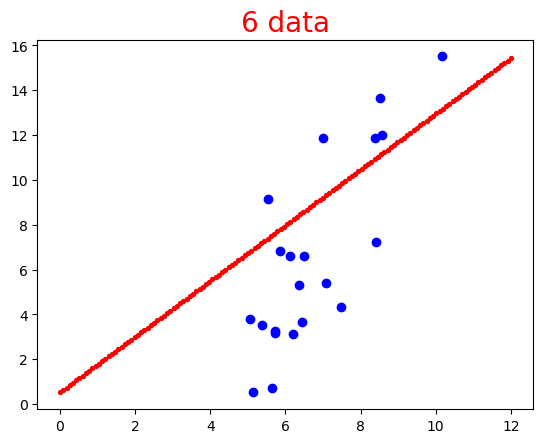

In [26]:
theta = theta_history[5]
b = b_history[5]

print(f'theta: {theta}, b = {b}')

x_plot = np.linspace(0, 12, 140)
y_plot = theta*x_plot + b


plt.scatter(x_plot, y_plot, s=8, color='red')
plt.scatter(x, y, color='blue')

plt.title("6 data", color='red', fontdict = {'fontsize': 20})
plt.show()

In [27]:
# ---------- Plot the errors over the training process ---------- #

Text(0.5, 1.0, 'Errors over epochs')

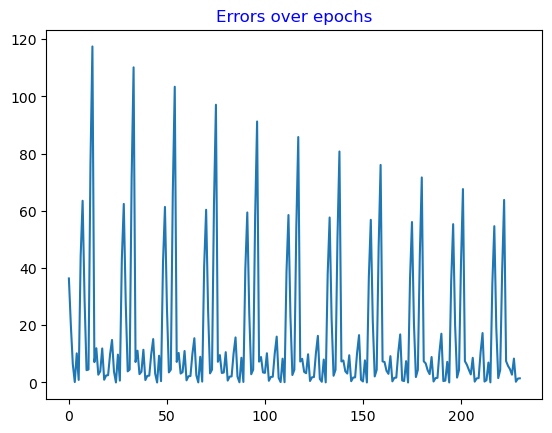

In [28]:
plot_x = list(range(len(loss_history)))
plot_y = loss_history
plt.plot(plot_x, plot_y)
plt.title("Errors over epochs", color = 'blue')

In [29]:
if b > 0:
    print(f'############ Final equation: y = {theta_history[-1]}x+{b} ############')
else:
    print(f'############ Final equation: y = {theta_history[-1]}x{b} ############')

############ Final equation: y = 1.1867112395232553x+0.5224160946654911 ############


theta: 1.1867112395232553, b = -3.0017845832123218


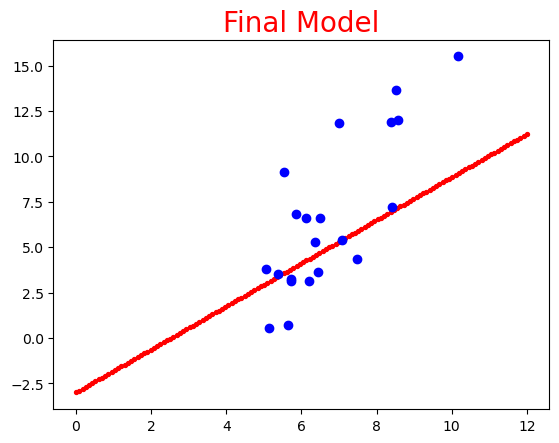

In [30]:
theta = theta_history[-1]
b = b_history[-1]

print(f'theta: {theta}, b = {b}')

x_plot = np.linspace(0, 12, 140)
y_plot = theta*x_plot + b


plt.scatter(x_plot, y_plot, s=8, color='red')
plt.scatter(x, y, color='blue')

plt.title("Final Model", color='red', fontdict = {'fontsize': 20})
plt.show()